In [1]:
import numpy as np
import pandas as pd
import spectral_analysis as sa
from spectral_analysis import spectrum, ray
import matplotlib.pyplot as plt

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Find shear automatically

Total power measured: 233 μW
Power on horizontal polarization: 73 μW
Power on vertical polarization: 160 μW
Total power measured: 232 μW
Power on horizontal polarization: 116 μW
Power on vertical polarization: 116 μW


d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


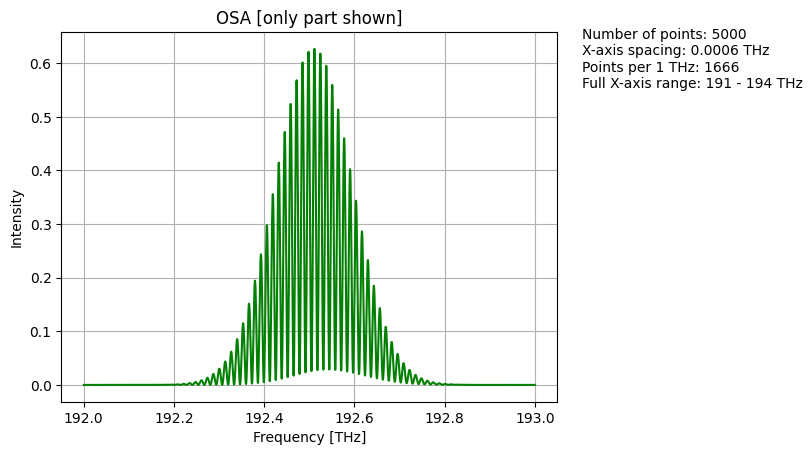

In [2]:
# prepare the pulse

def gaussian(omega, mu, sig):
    return np.exp(-np.power(omega - mu, 2.) / (2 * np.power(sig, 2.)))

gaussian = np.vectorize(gaussian)

X = np.linspace(191,194,5000)
Y_0 = X*0
Y = gaussian(X, 192.5, 0.12)

Y = Y.astype(complex)
X = X.astype(complex)
Y_0 = Y_0.astype(complex)

vertical = spectrum(X, Y, "freq", "intensity")
horizontal = spectrum(X, Y_0, "freq", "intensity")
light = ray(vertical, horizontal)

# propagate through system

light.polarizer(transmission_polar = "ver")                 # polarize light at filter

# chirping fiber
light.chirp(polarization = "ver", fiber_length = 82)        # chirp and delay
light.chirp(polarization = "hor", fiber_length = 82)
light.delay(polarization = "ver", delay = 82)         

light.rotate(np.pi*0.2)                                   # adjust polarization ratio to modulator

# modulator
transmission_matrix = np.array([[0.43, 0.55],[0.07, 0.015]]) # modulates vertical polarization
light.mix(transmission_matrix)
light.delay(polarization = "ver", delay = 16)
light.shear(0.017, polarization = "ver")   

light.powermeter()

# delay fiber
light.chirp(polarization = "ver", fiber_length = 60)        # chirp and delay
light.chirp(polarization = "hor", fiber_length = 60)
light.delay(polarization = "ver", delay = 60)        

light.rotate(np.pi*0.25)                                     # mix polarizations
light.powermeter()

light.polarizer(transmission_polar = "ver")                 # filter one

spectr = light.OSA(start = 192, end = 193)                  # measure

Total power measured: 233 μW
Power on horizontal polarization: 73 μW
Power on vertical polarization: 160 μW
Total power measured: 232 μW
Power on horizontal polarization: 116 μW
Power on vertical polarization: 116 μW


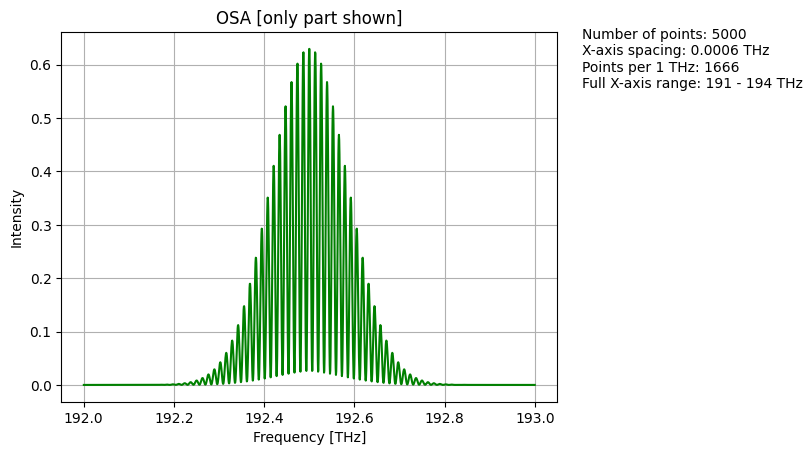

In [3]:
# prepare the pulse

def gaussian(omega, mu, sig):
    return np.exp(-np.power(omega - mu, 2.) / (2 * np.power(sig, 2.)))

gaussian = np.vectorize(gaussian)

X = np.linspace(191,194,5000)
Y_0 = X*0
Y = gaussian(X, 192.5, 0.12)

Y = Y.astype(complex)
X = X.astype(complex)
Y_0 = Y_0.astype(complex)

vertical = spectrum(X, Y, "freq", "intensity")
horizontal = spectrum(X, Y_0, "freq", "intensity")
light = ray(vertical, horizontal)

# propagate through system

light.polarizer(transmission_polar = "ver")                 # polarize light at filter

# chirping fiber
light.chirp(polarization = "ver", fiber_length = 82)        # chirp and delay
light.chirp(polarization = "hor", fiber_length = 82)
light.delay(polarization = "ver", delay = 82)         

light.rotate(np.pi*0.2)                                   # adjust polarization ratio to modulator

# modulator
transmission_matrix = np.array([[0.43, 0.55],[0.07, 0.015]]) # modulates vertical polarization
light.mix(transmission_matrix)
light.delay(polarization = "ver", delay = 16)

light.powermeter()

# delay fiber
light.chirp(polarization = "ver", fiber_length = 60)        # chirp and delay
light.chirp(polarization = "hor", fiber_length = 60)
light.delay(polarization = "ver", delay = 60)        

light.rotate(np.pi*0.25)                                     # mix polarizations
light.powermeter()

light.polarizer(transmission_polar = "ver")                 # filter one

temp_spectr = light.OSA(start = 192, end = 193)                  # measure

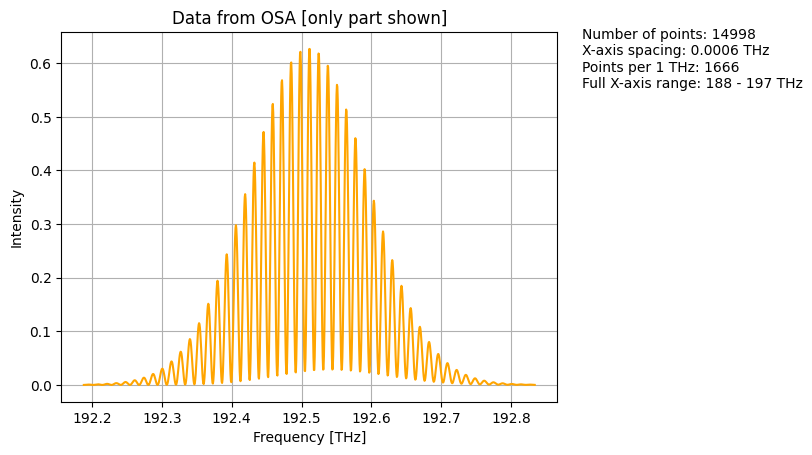

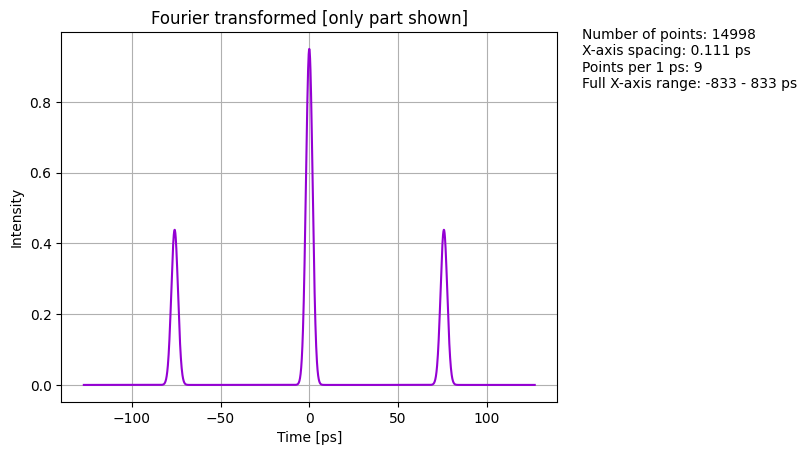

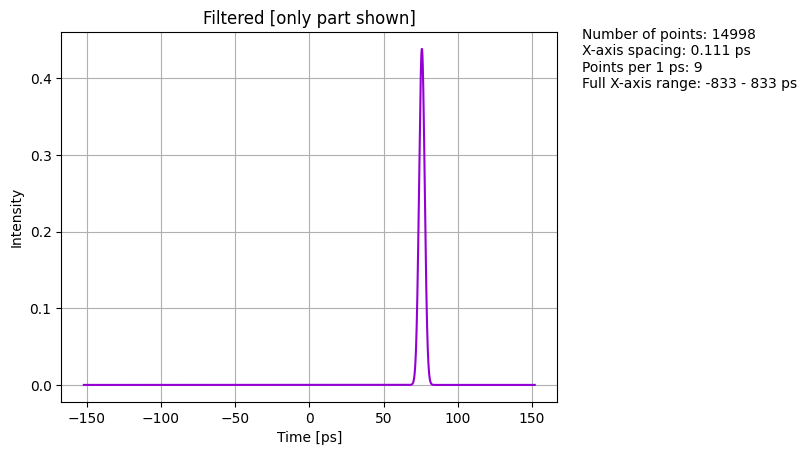

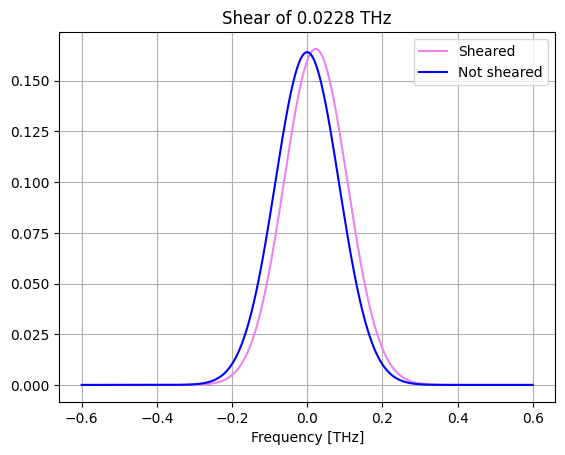

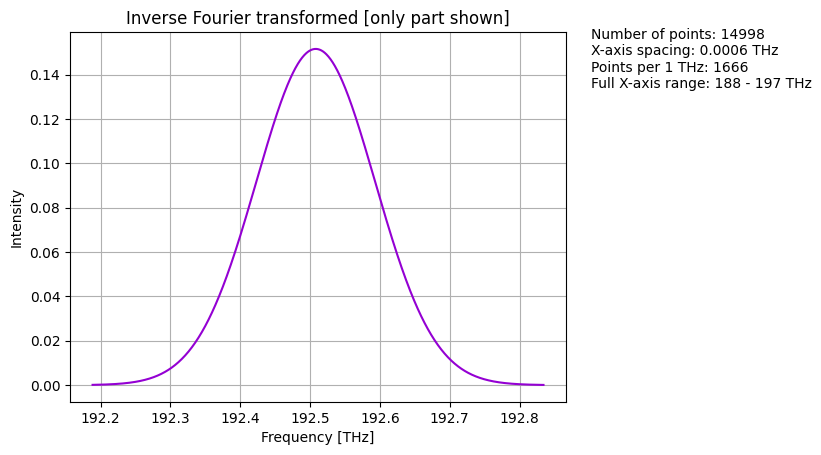

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


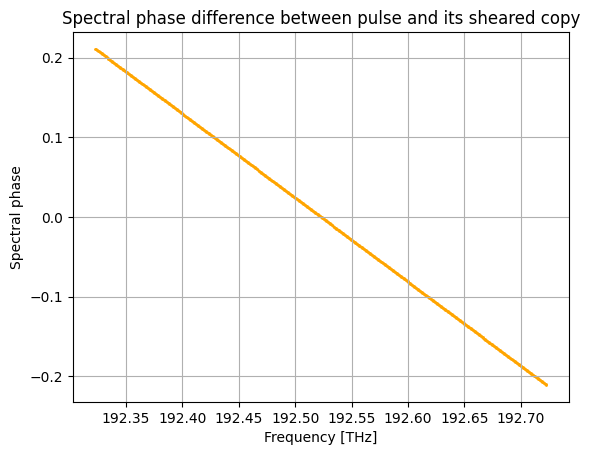

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


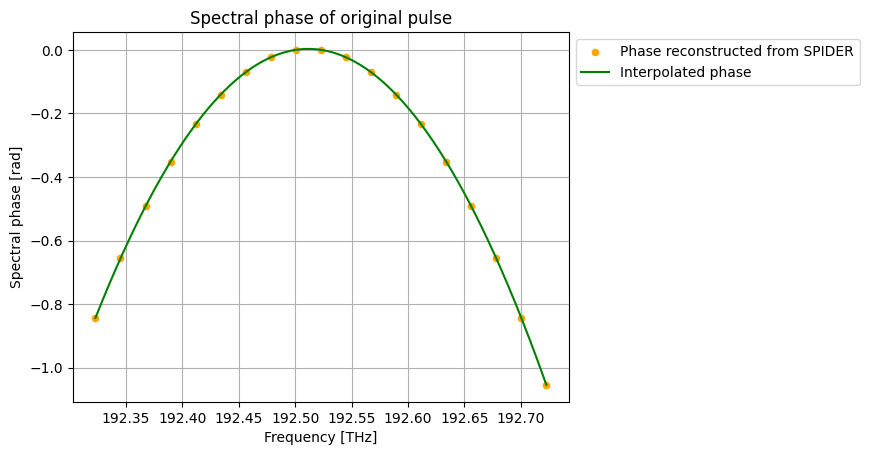

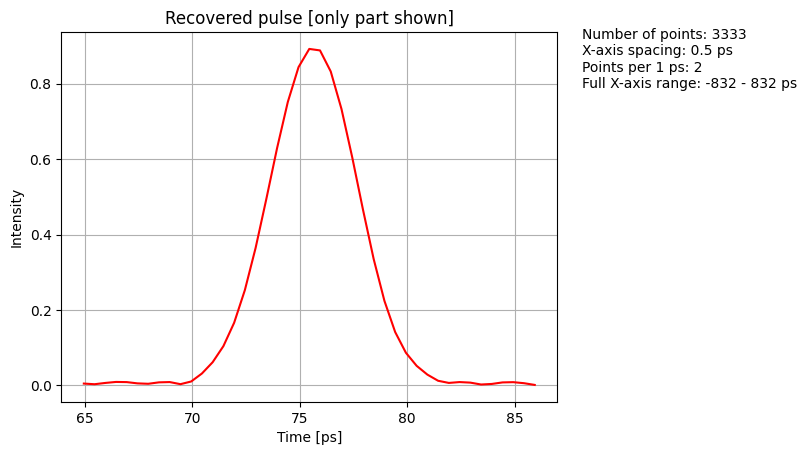

In [4]:
pulse = sa.spider(phase_spectrum = spectr,
          temporal_spectrum = temp_spectr,
          shear = None,
          intensity_spectrum = None,
          phase_borders = [192.3, 192.7],
          what_to_return = "phase",
          vis_param = 0.5,
          plot_steps = True,
          plot_phase = True,
          plot_pulse = True,
          plot_shear = True
          )[1]

pulse.Y *= -1

# comparison

C:\Users\rewas\AppData\Local\Temp\ipykernel_24712\547194554.py:9: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


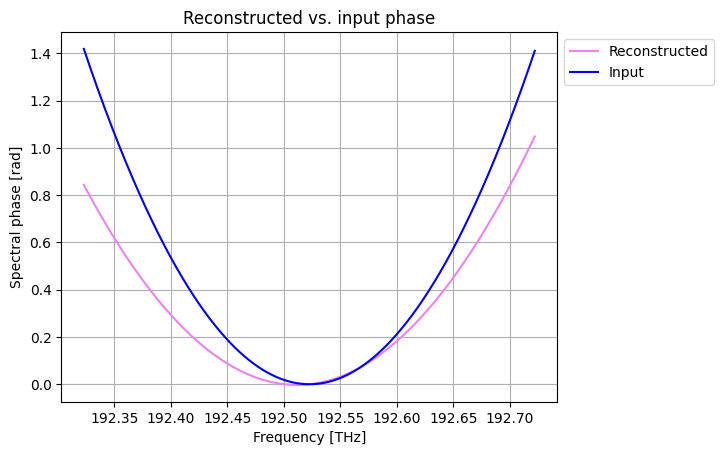

In [5]:
X = pulse.X

def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

Y = phase(X, np.mean(X), 82)

sim_pulse = spectrum(X, Y, "freq", "phase")
sa.compare_plots([pulse, sim_pulse], title = "Reconstructed vs. input phase", legend = ["Reconstructed", "Input"])

# plug in shear by hand

Total power measured: 233 μW
Power on horizontal polarization: 73 μW
Power on vertical polarization: 160 μW
Total power measured: 232 μW
Power on horizontal polarization: 116 μW
Power on vertical polarization: 116 μW


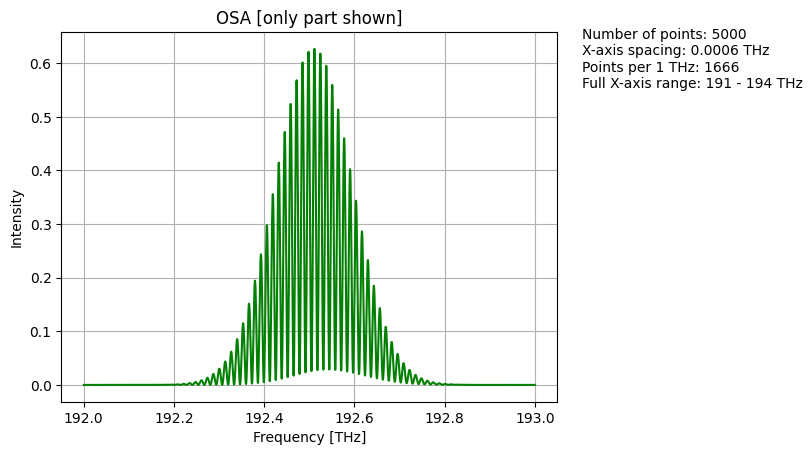

In [6]:
# prepare the pulse

def gaussian(omega, mu, sig):
    return np.exp(-np.power(omega - mu, 2.) / (2 * np.power(sig, 2.)))

gaussian = np.vectorize(gaussian)

X = np.linspace(191,194,5000)
Y_0 = X*0
Y = gaussian(X, 192.5, 0.12)

Y = Y.astype(complex)
X = X.astype(complex)
Y_0 = Y_0.astype(complex)

vertical = spectrum(X, Y, "freq", "intensity")
horizontal = spectrum(X, Y_0, "freq", "intensity")
light = ray(vertical, horizontal)

# propagate through system

light.polarizer(transmission_polar = "ver")                 # polarize light at filter

# chirping fiber
light.chirp(polarization = "ver", fiber_length = 82)        # chirp and delay
light.chirp(polarization = "hor", fiber_length = 82)
light.delay(polarization = "ver", delay = 82)         

light.rotate(np.pi*0.2)                                   # adjust polarization ratio to modulator

# modulator
transmission_matrix = np.array([[0.43, 0.55],[0.07, 0.015]]) # modulates vertical polarization
light.mix(transmission_matrix)
light.delay(polarization = "ver", delay = 16)
light.shear(0.017, polarization = "ver")   

light.powermeter()

# delay fiber
light.chirp(polarization = "ver", fiber_length = 60)        # chirp and delay
light.chirp(polarization = "hor", fiber_length = 60)
light.delay(polarization = "ver", delay = 60)        

light.rotate(np.pi*0.25)                                     # mix polarizations
light.powermeter()

light.polarizer(transmission_polar = "ver")                 # filter one

spectr = light.OSA(start = 192, end = 193)                  # measure

Total power measured: 233 μW
Power on horizontal polarization: 73 μW
Power on vertical polarization: 160 μW
Total power measured: 232 μW
Power on horizontal polarization: 116 μW
Power on vertical polarization: 116 μW


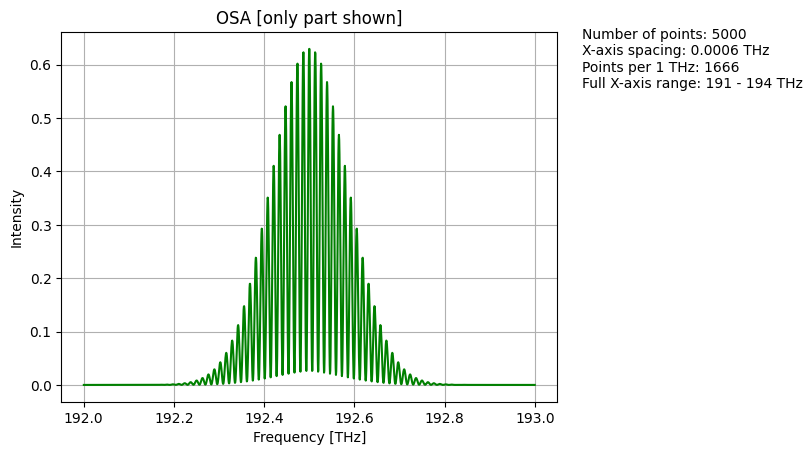

In [7]:
# prepare the pulse

def gaussian(omega, mu, sig):
    return np.exp(-np.power(omega - mu, 2.) / (2 * np.power(sig, 2.)))

gaussian = np.vectorize(gaussian)

X = np.linspace(191,194,5000)
Y_0 = X*0
Y = gaussian(X, 192.5, 0.12)

Y = Y.astype(complex)
X = X.astype(complex)
Y_0 = Y_0.astype(complex)

vertical = spectrum(X, Y, "freq", "intensity")
horizontal = spectrum(X, Y_0, "freq", "intensity")
light = ray(vertical, horizontal)

# propagate through system

light.polarizer(transmission_polar = "ver")                 # polarize light at filter

# chirping fiber
light.chirp(polarization = "ver", fiber_length = 82)        # chirp and delay
light.chirp(polarization = "hor", fiber_length = 82)
light.delay(polarization = "ver", delay = 82)         

light.rotate(np.pi*0.2)                                   # adjust polarization ratio to modulator

# modulator
transmission_matrix = np.array([[0.43, 0.55],[0.07, 0.015]]) # modulates vertical polarization
light.mix(transmission_matrix)
light.delay(polarization = "ver", delay = 16)

light.powermeter()

# delay fiber
light.chirp(polarization = "ver", fiber_length = 60)        # chirp and delay
light.chirp(polarization = "hor", fiber_length = 60)
light.delay(polarization = "ver", delay = 60)        

light.rotate(np.pi*0.25)                                     # mix polarizations
light.powermeter()

light.polarizer(transmission_polar = "ver")                 # filter one

temp_spectr = light.OSA(start = 192, end = 193)                  # measure

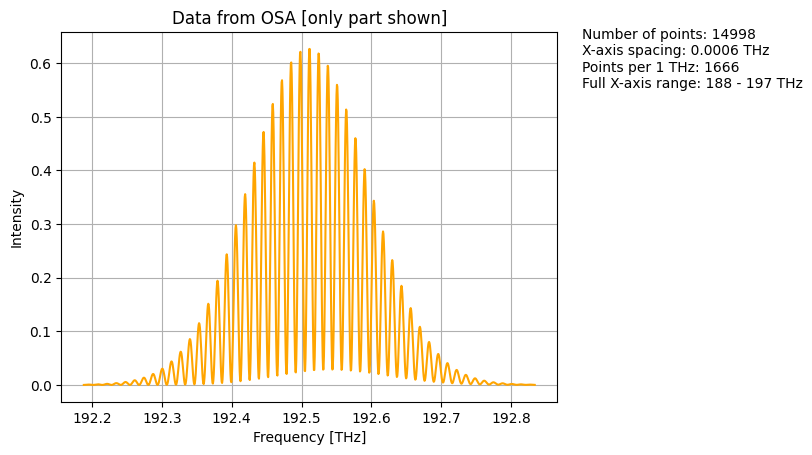

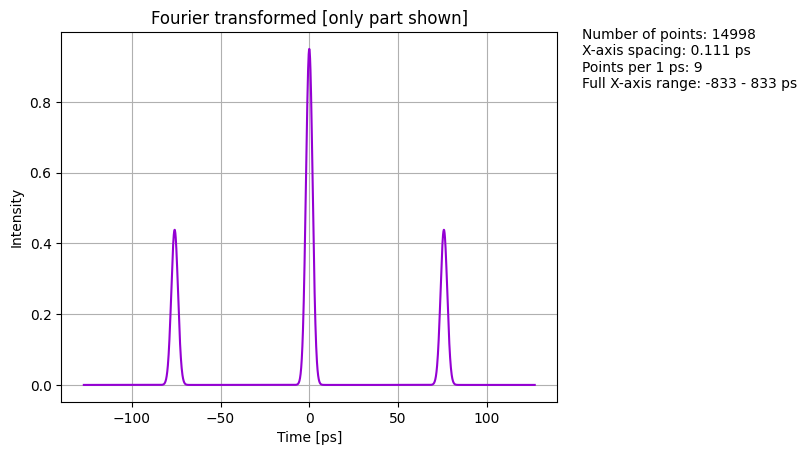

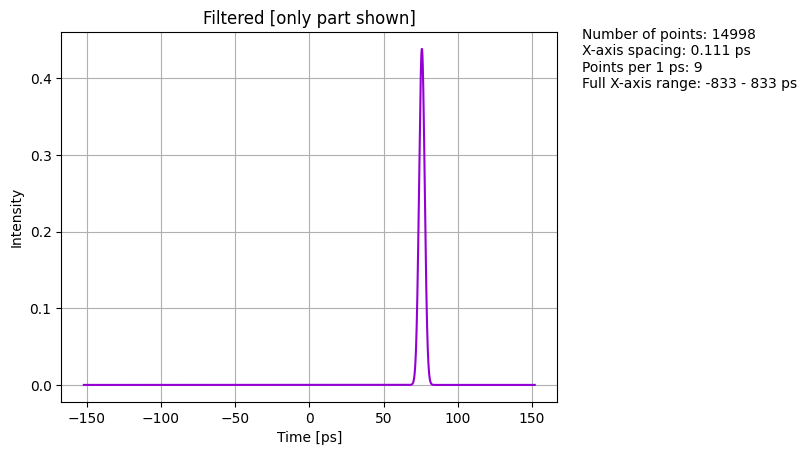

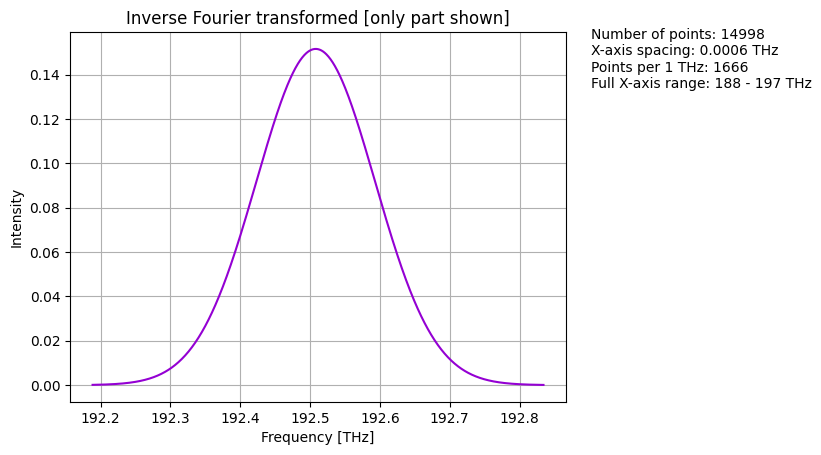

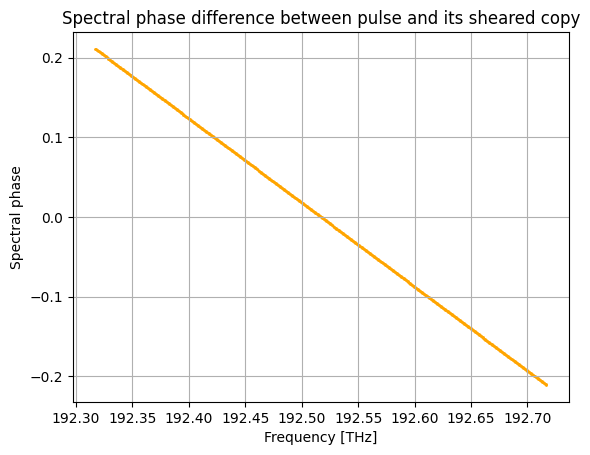

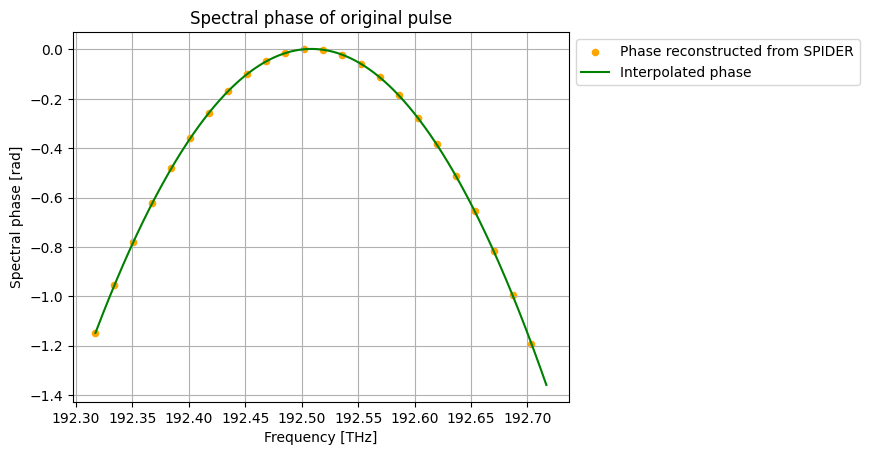

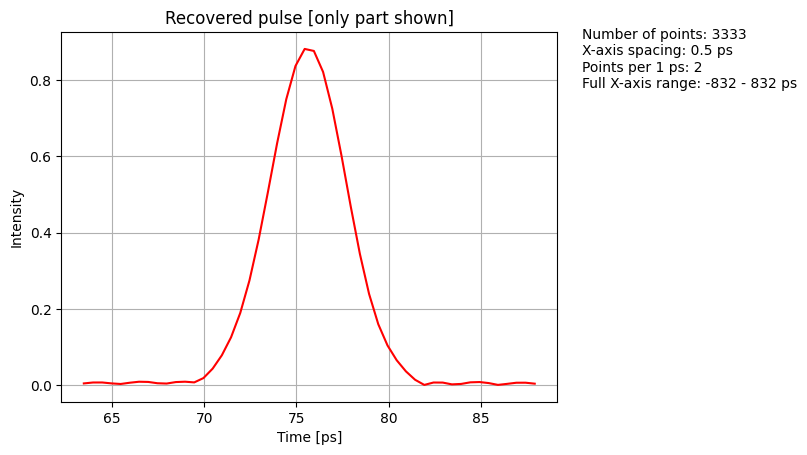

In [8]:
pulse = sa.spider(phase_spectrum = spectr,
          temporal_spectrum = temp_spectr,
          shear = 0.017,
          intensity_spectrum = None,
          phase_borders = [192.3, 192.7],
          what_to_return = "phase",
          vis_param = 0.5,
          plot_steps = True,
          plot_phase = True,
          plot_pulse = True,
          plot_shear = True
          )[1]

pulse.Y *= -1

C:\Users\rewas\AppData\Local\Temp\ipykernel_24712\547194554.py:9: RuntimeWarning: overflow encountered in long_scalars
  return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2


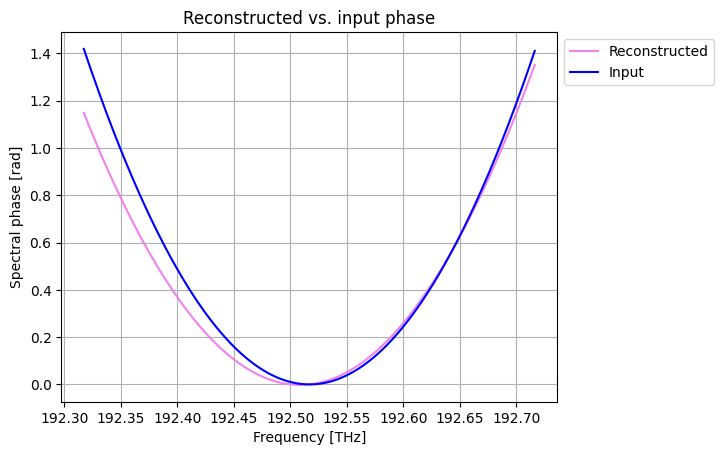

In [9]:
X = pulse.X

def phase(f, f_mean, fiber_length):
    l_0 = 1560
    c = 3*1e8
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

phase = np.vectorize(phase)

Y = phase(X, np.mean(X), 82)

sim_pulse = spectrum(X, Y, "freq", "phase")
sa.compare_plots([pulse, sim_pulse], title = "Reconstructed vs. input phase", legend = ["Reconstructed", "Input"])